<table width = "100%">
  <tr style="background-color:white;">
    <!-- QWorld Logo -->
    <td style="text-align:left;width:200px;"> 
        <a href="https://qworld.net/" target="_blank"><img src="../images/QWorld.png"> </a></td>
    <td style="text-align:right;vertical-align:bottom;font-size:16px;"> 
        Prepared by <a href="https://gitlab.com/sabahuddin.ahmad" target="_blank"> Sabah Ud Din Ahmad </a> and Özlem Salehi</td>
    </tr> 
 </table>
 
<hr>

# <font color="blue"> Solutions for </font> QUBO Formulation for Graph Coloring

<a id="task1"></a>
### Task 1

Write down the mathematical expressions that account for the constraints of the graph coloring problem. 

Moreover, give the expressions of the equivalent penalties and the corresponding QUBO for formulation for the graph coloring problem.

**Hint**: To get equivalent penalties, you can review the [Specific Cases](QUBO_PenaltyMethod.ipynb#cases) in the Penalty Method notebook.

<h3> Solution </h3>

#### Constraints & Penalties

Mathematically, we will express the given constraints and the corresponding penalties as follows:

1. *Each node must be colored using exactly one color.*

$$\sum_{c=0}^{K-1} x_{i,c} = 1 \;\;\;\;\;  i=0,\dots,N-1 .$$

The equivalent penalty is,
$$P\cdot \sum_{i=0}^{N-1} \left(1-\sum_{c=0}^{K-1}x_{i,p}\right)^2.$$

2. *Adjacent nodes must be assigned different colors.*

$$x_{i,c} + x_{j,c} \leq 1 \;\;\;\;\;  c=0,\dots,K-1 .$$

for all adjacent nodes $(i,j) \in E$ in the graph. 

The equivalent penalty is,
$$P\cdot \sum_{(i,j) \in E} \sum_{c=0}^{K-1} x_{i,c}x_{j,c}.$$

#### QUBO for Graph Coloring

Unlike TSP, there is no cost function we would like to minimize. Hence, the objective function will consist of only the penalty terms.

$$H(x)=P_1 \cdot \sum_{i=0}^{N-1} \left(1-\sum_{c=0}^{K-1}x_{i,c}\right)^2 + P_2 \cdot \sum_{(i,j) \in E} \sum_{c=0}^{K-1} x_{i,c}x_{j,c}$$

Here, $P_1$ and $P_2$ are positive, scalar penalty parameters.

<a id="task2"></a>

### Task 2

For the given graph, write down the open form of the QUBO expression for 2 colors $c=0,1$. Using the QUBO expression, obtain the corresponding $Q$ matrix.

<img src="../images/gc_5.png" width="200">


<h3> Solution </h3>

QUBO expression for the given graph is,
$$H(x)=\sum_{i=0}^{2} \left(1-\sum_{c=0}^{1}x_{i,c}\right)^2 + \sum_{(i,j) \in E} \sum_{c=0}^{1} x_{i,c}x_{j,c}$$

Let's look at the first term.
$$\sum_{i=0}^{2} \left(1-\sum_{c=0}^{1}x_{i,c}\right)^2$$
Expanding the sum we get,

\begin{align*}
&\left(1-(x_{00}+x_{01})\right)^2+\left(1-(x_{10}+x_{11})\right)^2+\left(1-(x_{20}+x_{21})\right)^2\\
&=\left(1-x_{00}-x_{01}\right)^2+\left(1-x_{10}-x_{11}\right)^2+\left(1-x_{20}-x_{21})\right)^2 \\
&= 1 + x_{0,0}^2 +x_{0,1}^2-2x_{0,0}-2x_{0,1}+ 2x_{0,0}x_{0,1} + 1 + x_{1,0}^2 +x_{1,1}^2-2x_{1,0}-2x_{1,1}+ 2x_{1,0}x_{1,1} + 1 + x_{2,0}^2 +x_{2,1}^2-2x_{2,0}-2x_{2,1}+ 2x_{2,0}x_{2,1} \\
&= 3 - x_{0,0} - x_{0,1}  - x_{1,0}  - x_{1,1} -x_{2,0} - x_{2,1} + 2x_{0,0}x_{0,1}+ 2x_{1,0}x_{1,1} + 2x_{2,0}x_{2,1}
\end{align*}


Let's look at the second term.
$$P\sum_{(i,j) \in E} \sum_{c=0}^{1} x_{i,c}x_{j,c}.$$

Here, $E=\{(0,1),(0,2),(1,2)\}$. We get $x_{0,0}x_{1,0}+x_{0,0}x_{2,0}+x_{1,0}x_{2,0}+x_{0,1}x_{1,1}+x_{0,1}x_{2,1}+x_{1,1}x_{2,1}.$




Combining both we obtain, 

$$H(x) =3 - x_{0,0} - x_{0,1}  - x_{1,0}  - x_{1,1} -x_{2,0} - x_{2,1} + 2x_{0,0}x_{0,1}+ 2x_{1,0}x_{1,1} + 2x_{2,0}x_{2,1} +x_{0,0}x_{1,0}+x_{0,0}x_{2,0}+x_{1,0}x_{2,0}+x_{0,1}x_{1,1}+x_{0,1}x_{2,1}+x_{1,1}x_{2,1}.
$$

Now let us write down the $Q$ matrix assuming that the rows and columns are ordered in the following order:

$$x_{0,0},x_{0,1},x_{1,0},x_{1,1},x_{2,0},x_{2,1}$$.



$$Q=
\begin{pmatrix}
       &x_{0,0}   &x_{0,1}    &x_{1,0}   &x_{1,1}    &x_{2,0}     & x_{2,1}   \\
x_{0,0}& -1       & 2         &1         & 0         & 1          & 0         \\
x_{0,1}& 0        & -1        &0         & 1         & 0          & 1         \\
x_{1,0}& 0        & 0         &-1        & 2         & 1          & 0         \\
x_{1,1}& 0        & 0         & 0        & -1        & 0          & 1         \\
x_{2,0}& 0        & 0         & 0        & 0         & -1         & 2         \\
x_{2,1}& 0        & 0         & 0        & 0         & 0          & -1        \\
\end{pmatrix}$$


<a id="task3"></a>

### Task 3

Create the above $Q$ matrix using numpy. Use the `qubo_solver` defined previously to find the vector $x$ that minimizes $x^TQx$. What can you conclude about the result?

### Solution

In [7]:
# Access the qubo_solver() function
%run qubo_functions.py

In [10]:
import numpy as np

# Define Q matrix
Q = np.array([
[-1,  2,  1,  0,  1,  0],
[ 0, -1,  0,  1,  0,  1],
[ 0,  0, -1,  2,  1,  0],
[ 0,  0,  0, -1,  0,  1],  
[ 0,  0,  0,  0, -1,  2], 
[ 0,  0,  0,  0,  0, -1],     
]    
)

In [11]:
qubo_solver(Q)

'The vector (1, 0, 1, 0, 0, 1) minimizes the objective function to a value of -2.'

From the vector, we deduce that $x_{0,0}=1$ , $x_{1,0}=1$ and $x_{2,1}=1$. Hence the node 0 is colored with color 0, node 1 is colored with color 0 and node 2 is colored with color 1.

Note that the offset is $3$ and the objective value is $3+-2=1$. This means there is a constraint which is violated and we have a penalty of +1. This is beacuse the nodes 0 and 1 are colored using the same color.

We can conclude that there is no feasible solution using only 2 colors.

The solution can be visualized as follows.

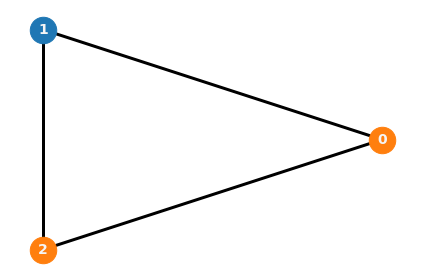

In [3]:
import bqm_utils
import networkx as nx

G = nx.Graph()
edges = [(0, 1), (1, 2), (2, 0)]
G.add_edges_from(edges)

coloring = {0: 1, 1: 0, 2: 1}

bqm_utils.graph_coloring_viz(G, coloring)

<a id="task4"></a>

### Task 4

For the graph given in Task 2, create the $Q$ matrix using numpy using 3 colors $c\in\{0,1,2\}$. Use the `qubo_solver` defined previously to find the vector $x$ that minimizes $x^TQx$. What can you conclude about the result?

### Solution

First let us write down the $Q$ matrix assuming that the rows and columns are ordered in the following order:

$$x_{0,0},x_{0,1},x_{0,2},x_{1,0},x_{1,1},x_{1,2},x_{2,0},x_{2,1},x_{2,2}$$.



$$Q=
\begin{pmatrix}
       &x_{0,0}   &x_{0,1}    &x_{0,2}   &x_{1,0}    &x_{1,1}     &x_{1,2}    &x_{2,0}     &x_{2,1}   &x_{2,2}   \\
x_{0,0}& -1       & 2         & 2        & 1         & 0          & 0         & 1          & 0        & 0        \\
x_{0,1}& 0        & -1        & 2        & 0         & 1          & 0         & 0          & 1        & 0        \\
x_{0,2}& 0        & 0         &-1        & 0         & 0          & 1         & 0          & 0        & 1        \\
x_{1,0}& 0        & 0         & 0        & -1        & 2          & 2         & 1          & 0        & 0        \\
x_{1,1}& 0        & 0         & 0        & 0         & -1         & 2         & 0          & 1        & 0        \\
x_{1,2}& 0        & 0         & 0        & 0         & 0          &-1         & 0          & 0        & 1        \\
x_{2,0}& 0        & 0         & 0        & 0         & 0          & 0         & -1         &  2       & 2        \\
x_{2,1}& 0        & 0         & 0        & 0         & 0          & 0         & 0          & -1       & 2        \\
x_{2,2}& 0        & 0         & 0        & 0         & 0          & 0         & 0          & 0        & -1        \\
\end{pmatrix}$$


In [2]:
# Access the qubo_solver() function
%run qubo_functions.py

In [12]:
import numpy as np

# Define Q matrix
Q = np.array([
[-1,  2,  2,  1,  0,  0,  1,  0,   0],
[ 0, -1,  2,  0,  1,  0,  0,  1,   0],
[ 0,  0, -1,  0,  0,  1,  0,  0,   1],
[ 0,  0,  0, -1,  2,  2,  1,  0,   0],  
[ 0,  0,  0,  0, -1,  2,  0,  1,   0], 
[ 0,  0,  0,  0,  0, -1,  0,  0,   1],
[ 0,  0,  0,  0,  0,  0, -1,  2,   2],
[ 0,  0,  0,  0,  0,  0,  0, -1,   2],
[ 0,  0,  0,  0,  0,  0,  0,  0,  -1],
]    
)

In [13]:
qubo_solver(Q)

'The vector (1, 0, 0, 0, 1, 0, 0, 0, 1) minimizes the objective function to a value of -3.'

From the vector, we deduce that $x_{0,0}=1$ , $x_{1,1}=1$ and $x_{2,2}=1$. Hence the node 0 is colored with color 0, node 1 is colored with color 1 and node 2 is colored with color 2.

Note that the offset is $3$ and the objective value is $3+-3=0$. This means there is no constraint which is violated.

We can conclude that we obtained a feasible solution.

We can visualize the result as follows.

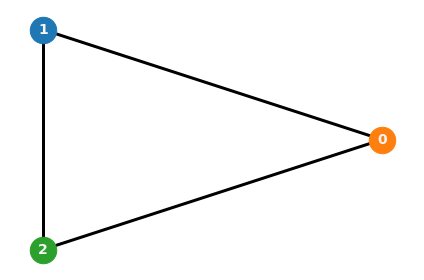

In [4]:
import bqm_utils
import networkx as nx

G = nx.Graph()
edges = [(0, 1), (1, 2), (2, 0)]
G.add_edges_from(edges)

coloring = {0: 1, 1: 0, 2: 2}

bqm_utils.graph_coloring_viz(G, coloring)

<a id="task5"></a>

### Task 5 (On paper)

Suppose that you are given the following graph and we have 3 colors, $c \in \{0,1,2\}$ corresponding to  corresponding to colors yellow, green and blue respectively. Note that node 1 is colored yellow. 

For which binary variables you can conclude that they are either 0 or 1 with certainty? List all such variables.

<img src="../images/gc_2.png" width="200">

### Solution

To start with, we know that $x_{1,0}=1$. Hence, node 1 can not be colored using any of the other colors and we conclude

$$x_{1,1}=x_{1,2}=0 $$.

We can also conclude that neigbors of node 1 can not be colored using yellow which yields

$$x_{0,0}=x_{2,0}=x_{3,0}=x_{4,0}=0.$$

<a id="task6"></a>
### Task 6

Using the knowledge from Task 5, create the $Q$ matrix for the given graph using numpy using 3 colors $c\in \{0,1,2\}$. Use the `qubo_solver` defined previously to find the vector $x$ that minimizes $x^TQx$. What can you conclude about the result?

<h3> Solution </h3>

Note that we will not need the variables $,x_{0,0},x_{1,0},x_{1,1},x_{1,2},x_{2,0},x_{3,0},x_{4,0}$ as their values are already set.

Let us write down the $Q$ matrix assuming that the rows and columns are ordered in the following order:

$$x_{0,1},x_{0,2},x_{2,1},x_{2,2},x_{3,1},x_{3,2},x_{4,1},x_{4,2}$$.



We obtain the following $Q$ matrix:

$$Q = \begin{pmatrix}
        &x_{0,1}   &x_{0,2}    &x_{2,1}   &x_{2,2}    &x_{3,1}     &x_{3,2}    &x_{4,1}     &x_{4,2} \\
x_{0,1} &-1 & 2 & 0 & 0 & 0 & 0 & 1 & 0\\
x_{0,2}&0 & -1 & 0 & 0 & 0 & 0 & 0 & 1\\
x_{2,1}&0 & 0 & -1 & 2 & 1 & 0 & 0 & 0\\
x_{2,2}&0 & 0 & 0 & -1 & 0 & 1 & 0 & 0\\
x_{3,1}&0 & 0 & 0 & 0 & -1 & 2 & 1 & 0\\
x_{3,2}&0 & 0 & 0 & 0 & 0 & -1 & 0 & 1\\
x_{4,1}&0 & 0 & 0 & 0 & 0 & 0 & -1 & 2\\
x_{3,1}&0 & 0 & 0 & 0 & 0 & 0 & 0 & -1\\
\end{pmatrix}$$

In [16]:
# Access the qubo_solver() function
%run qubo_functions.py

In [17]:
import numpy as np

# Define Q matrix
Q = np.array([
[-1,  2,  0,  0,  0,  0,  1,  0],
[ 0, -1,  0,  0,  0,  0,  0,  1],
[ 0,  0, -1,  2,  1,  0,  0,  0],
[ 0,  0,  0, -1,  0,  1,  0,  0],  
[ 0,  0,  0,  0, -1,  2,  1,  0], 
[ 0,  0,  0,  0,  0, -1,  0,  1],
[ 0,  0,  0,  0,  0,  0, -1,  2],
[ 0,  0,  0,  0,  0,  0,  0, -1],
]    
)

In [18]:
qubo_solver(Q)

'The vector (1, 0, 0, 1, 1, 0, 0, 1) minimizes the objective function to a value of -4.'

$$x_{0,1},x_{0,2},x_{2,1},x_{2,2},x_{3,1},x_{3,2},x_{4,1},x_{4,2}$$.

From the vector, we deduce that $x_{0,1}=1$ , $x_{2,2}=1$, $x_{3,1}=1$ and $x_{4,2}=1$. 

Hence the node 0 is colored with color 1, node 2 is colored with color 2, node 3 is colored with color 1 and node 4 is colored with color 2.

Note that the offset is $4$ and the objective value is $4+-4=0$. This means there is no constraint which is violated.

We can conclude that we obtained a feasible solution.

We can visualize the result as follows, noting that colors 0, 1, 2 correspond to yellow, green and blue respectively.

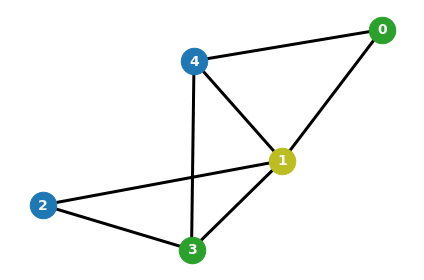

In [20]:
import bqm_utils
import networkx as nx

G = nx.Graph()
edges = [(0, 1), (0,4), (1,2), (1,3), (1,4), (2,3), (3,4)]
G.add_edges_from(edges)

coloring = {0: 'G', 1: 'Y', 2: 'B', 3: 'G', 4: 'B'}

bqm_utils.graph_coloring_viz(G, coloring)